# Fase 1: Limpeza e Pré-processamento dos Dados

1.  **Carregamento dos Dados**: Importação das bibliotecas e leitura do arquivo CSV.
2.  **Tratamento da Variável Alvo (`Churn`)**: Remoção de registros onde a variável alvo é nula.
3.  **Correção de Tipos e Tratamento de Nulos (`Charges.Total`)**: Conversão da coluna para o tipo numérico e tratamento inteligente dos valores ausentes.
4.  **Validação da Consistência dos Dados**: Verificação de regras de negócio entre as colunas de serviços.

In [1]:
import pandas as pd
import numpy as np

dados = r'E:\Documentos\Cursos\Alura\ONE\Desafio-03\telecom_x.csv'

df = pd.read_csv(dados)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


# Remoção de colunas desnecessárias

In [2]:
df.drop(columns=['customerID'], axis=1, inplace=True, errors='ignore')
print('Coluna removida com sucesso')
print(f'Dimensões do DataFrame: {df.shape}')

Coluna removida com sucesso
Dimensões do DataFrame: (7267, 20)


### 2. Tratamento da Variável Alvo (`Churn`)

A variável alvo é essencial para o treinamento de um modelo supervisionado. Registros com o valor de `Churn` ausente não podem ser utilizados e serão removidos.

In [3]:
print(f'Quantidade de valores nulos antes: {df['Churn'].isnull().sum()}')
df.dropna(subset=['Churn'], inplace=True)
print(f'Quantidade de valores nulos após a remoção: {df['Churn'].isnull().sum()}')
print(f'Novas dimensões do Dataset: {df.shape}')

Quantidade de valores nulos antes: 224
Quantidade de valores nulos após a remoção: 0
Novas dimensões do Dataset: (7043, 20)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

### 3. Correção de Tipos e Tratamento de Nulos (`Charges.Total`)

A coluna `Charges.Total` frequentemente é carregada como `object` (texto) se contiver espaços ou outros caracteres não numéricos. O primeiro passo é convertê-la para um formato numérico, forçando os valores inválidos a se tornarem `NaN` (Not a Number).

In [5]:
# Converter 'Charges.Total' para numérico. errors='coerce' transforma o que não for número em NaN.
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
# Verificar quantos valores nulos foram criados/encontrados
nulos_total_charges = df['Charges.Total'].isnull().sum()
print(f'A quantidade de valores NaN na coluna Charges.Total é: {nulos_total_charges}')

A quantidade de valores NaN na coluna Charges.Total é: 11


#### 3.1 Investigando a Causa dos Valores Nulos

Antes de aplicar uma regra genérica de imputação, vamos investigar por que esses valores são nulos. A hipótese é que eles pertencem a clientes novos com `tenure` (tempo de contrato) igual a 0.

In [6]:
# Filtrar o dataframe para ver os registros onde 'Charges.Total' é nulo
registros_nulos = df[df['Charges.Total'].isnull()]
print("Valores de 'tenure' para registros com 'Charges.Total' nulo:")
print(registros_nulos['tenure'].value_counts())

Valores de 'tenure' para registros com 'Charges.Total' nulo:
tenure
0    11
Name: count, dtype: int64


#### 3.2 Imputação dos Valores Nulos

A investigação confirma que todos os valores ausentes em `Charges.Total` correspondem a clientes com `tenure = 0`. Portanto, a imputação correta e que reflete a realidade do negócio é preencher esses valores com `0`.

In [7]:
# Preenche com 0 apenas onde a coluna 'Charges.Total' for nula (NA)
df.loc[df['Charges.Total'].isna(), 'Charges.Total'] = 0
print(f"Valores nulos em 'Charges.Total' após imputação: {df['Charges.Total'].isnull().sum()}")

Valores nulos em 'Charges.Total' após imputação: 0


In [8]:
# Exibir as primeiras linhas e os tipos de dados para verificar o estado atual
print("Dataset antes da codificação:")
display(df.head())
print("\nTipos de dados antes da codificação:")
df.info()

Dataset antes da codificação:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40



Tipos de dados antes da codificação:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperless

### 1. Codificação da Variável Alvo (`Churn`)

A variável alvo `Churn` precisa ser convertida para um formato numérico. Adotaremos a convenção `No = 0` e `Yes = 1`.

In [9]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

print('Valores da coluna "Churn" após a codificação:')
print(df['Churn'].value_counts())

Valores da coluna "Churn" após a codificação:
Churn
0    5174
1    1869
Name: count, dtype: int64


### 2. Codificação de Variáveis Binárias

Colunas com respostas 'Yes'/'No' e a coluna `gender` serão convertidas para `0/1`.

In [10]:
# Codificação para 'gender' especificamente
df['gender'] = df['gender'].map({'Female':0, 'Male':1})
# Lista de outras colunas binárias com formato 'Yes'/'No'
colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
mapa_binario = {'No':0, 'Yes':1}
for coluna in colunas_binarias:
    df[coluna] = df[coluna].map(mapa_binario)

print('Prévia dos dados após a codificação binária:')
display(df[['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']].head())

Prévia dos dados após a codificação binária:


,gender,Partner,Dependents,PhoneService,PaperlessBilling
0,0,1,1,1,1
1,1,0,0,1,0
2,1,0,0,1,1
3,1,1,0,1,1
4,0,1,0,1,1


### 3. Codificação de Variável Ordinal (`Contract`)

A coluna `Contract` tem uma ordem clara (`Month-to-month` < `One year` < `Two year`), que representa um nível de compromisso crescente do cliente. Usaremos o mapeamento manual para preservar essa relação.

In [11]:
df.Contract.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [12]:
mapa_contrato = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}

df['Contract'] = df['Contract'].map(mapa_contrato)

print('Valores da coluna "Contract" após a codificação:')
print(df['Contract'].value_counts())

Valores da coluna "Contract" após a codificação:
Contract
0    3875
2    1695
1    1473
Name: count, dtype: int64


In [13]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,0,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,1,1,Mailed check,65.6,593.30
1,0,1,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,0,0,Mailed check,59.9,542.40
2,1,1,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,0,1,Electronic check,73.9,280.85
3,1,1,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,0,1,Electronic check,98.0,1237.85
4,1,0,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,0,1,Mailed check,83.9,267.40


### 4. Codificação de Variáveis Nominais (One-Hot Encoding)

As variáveis categóricas restantes não possuem uma ordem intrínseca. Para estas, aplicaremos o One-Hot Encoding, que cria uma nova coluna para cada categoria.

Usaremos `pd.get_dummies` com o parâmetro `drop_first=True` para evitar multicolinearidade, uma boa prática para modelos lineares.

In [14]:
# Identificar as colunas categóricas restantes (tipo 'object')
colunas_nominais = df.select_dtypes(include=['object']).columns.tolist()
print(f"Colunas a serem transformadas com One-Hot Encoding: {colunas_nominais}")

# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=colunas_nominais, drop_first=True)

print("\nDimensões do dataset após One-Hot Encoding:", df.shape)
print("Prévia dos dados com as novas colunas:")
display(df.head())
df.info()

Colunas a serem transformadas com One-Hot Encoding: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']

Dimensões do dataset após One-Hot Encoding: (7043, 30)
Prévia dos dados com as novas colunas:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,Charges.Monthly,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,1,65.6,...,False,False,True,False,True,False,False,False,False,True
1,0,1,0,0,0,9,1,0,0,59.9,...,False,False,False,False,False,False,True,False,False,True
2,1,1,0,0,0,4,1,0,1,73.9,...,True,False,False,False,False,False,False,False,True,False
3,1,1,1,1,0,13,1,0,1,98.0,...,True,False,False,False,True,False,True,False,True,False
4,1,0,1,1,0,3,1,0,1,83.9,...,False,False,True,False,True,False,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   int64  
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   Contract                               7043 non-null   int64  
 8   PaperlessBilling                       7043 non-null   int64  
 9   Charges.Monthly                        7043 non-null   float64
 10  Charges.Total                          7043 non-null   float64
 11  MultipleL

# Fase 2: Análise Exploratória de Dados (EDA)

O objetivo desta fase é explorar os dados pré-processados para entender as características dos clientes, identificar padrões e formular hipóteses sobre os principais fatores que influenciam o churn. 

Vamos realizar as seguintes análises:
1.  **Análise da Variável Alvo (`Churn`)**: Verificar o balanceamento das classes.
2.  **Churn vs. Features Categóricas**: Analisar a taxa de churn para diferentes categorias de serviços e contratos.
3.  **Churn vs. Features Numéricas**: Comparar a distribuição de variáveis numéricas entre clientes que cancelaram e os que não cancelaram.
4.  **Matriz de Correlação**: Investigar a relação linear entre as principais variáveis numéricas.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o estilo dos gráficos para melhor visualização
sns.set_theme(style="whitegrid")

### Carregando os Dados

Para a EDA, usaremos o arquivo `telecom_x_cleaned.csv`, pois ele contém as categorias originais, o que facilita a interpretação dos gráficos.

In [16]:
caminho_arquivo_limpo = r'E:\Documentos\Cursos\Alura\ONE\Desafio-03\telecom_x_cleaned.csv'
df_limpo = pd.read_csv(caminho_arquivo_limpo)

# Para facilitar cálculos, vamos mapear a coluna Churn para 0 e 1 (a versão original é 'No'/'Yes')
df_limpo['Churn_num'] = df_limpo['Churn'].map({'No': 0, 'Yes': 1})

display(df_limpo.head())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn_num
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1


### 1. Análise da Variável Alvo (`Churn`)

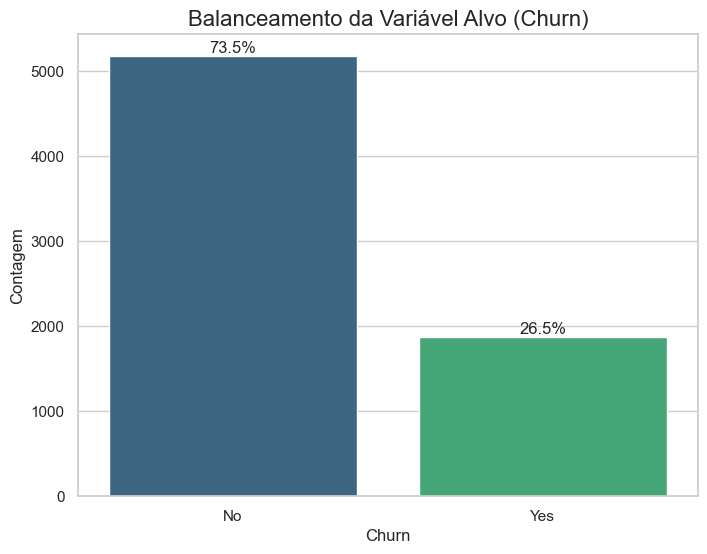

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn',
                   data=df_limpo, 
                   palette='viridis',
                   hue='Churn',
                   legend=False)

total = len(df['Churn'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Balanceamento da Variável Alvo (Churn)', fontsize=16)
plt.ylabel('Contagem')
plt.xlabel('Churn')
plt.show()

**Conclusão Preliminar:** Como esperado, o dataset é desbalanceado. Aproximadamente 26.5% dos clientes na amostra cancelaram o serviço. Isso deverá ser levado em conta na fase de modelagem.

### 2. Churn vs. Features Categóricas

Analisaremos a taxa de churn para as categorias de `Contract`, `InternetService` e `PaymentMethod`.

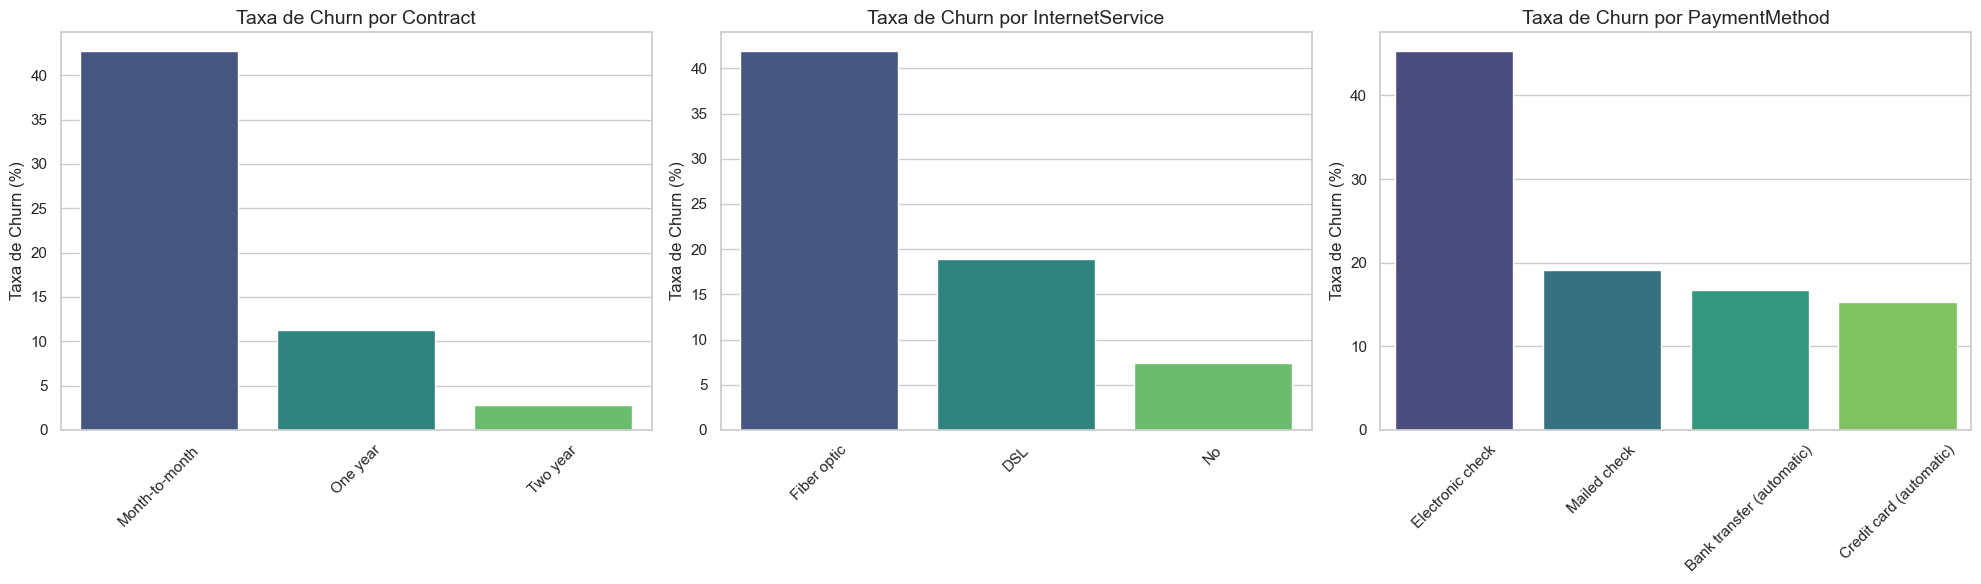

In [18]:
features_categoricas = ['Contract', 'InternetService', 'PaymentMethod']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, feature in enumerate(features_categoricas):
    churn_rate = df_limpo.groupby(feature)['Churn_num'].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, 
                y=churn_rate.values * 100, 
                ax=axes[i], 
                palette='viridis',
                hue=churn_rate.index,
                legend=False)
    axes[i].set_title(f'Taxa de Churn por {feature}', fontsize=14)
    axes[i].set_ylabel('Taxa de Churn (%)')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Conclusões Preliminares:**
* **Contrato:** Clientes com contrato `Month-to-month` (mensal) têm uma taxa de churn drasticamente maior do que os com contratos de 1 ou 2 anos.
* **Serviço de Internet:** Clientes com `Fiber optic` (fibra óptica) cancelam muito mais do que os com DSL. Curiosamente, a taxa de churn para quem não tem internet é baixíssima.
* **Método de Pagamento:** `Electronic check` (cheque eletrônico) se destaca como o método com a maior taxa de churn.

### 3. Churn vs. Features Numéricas

Vamos visualizar a distribuição de `tenure` e `Charges.Monthly` para ambos os grupos de clientes (Churn 'Yes' e 'No').

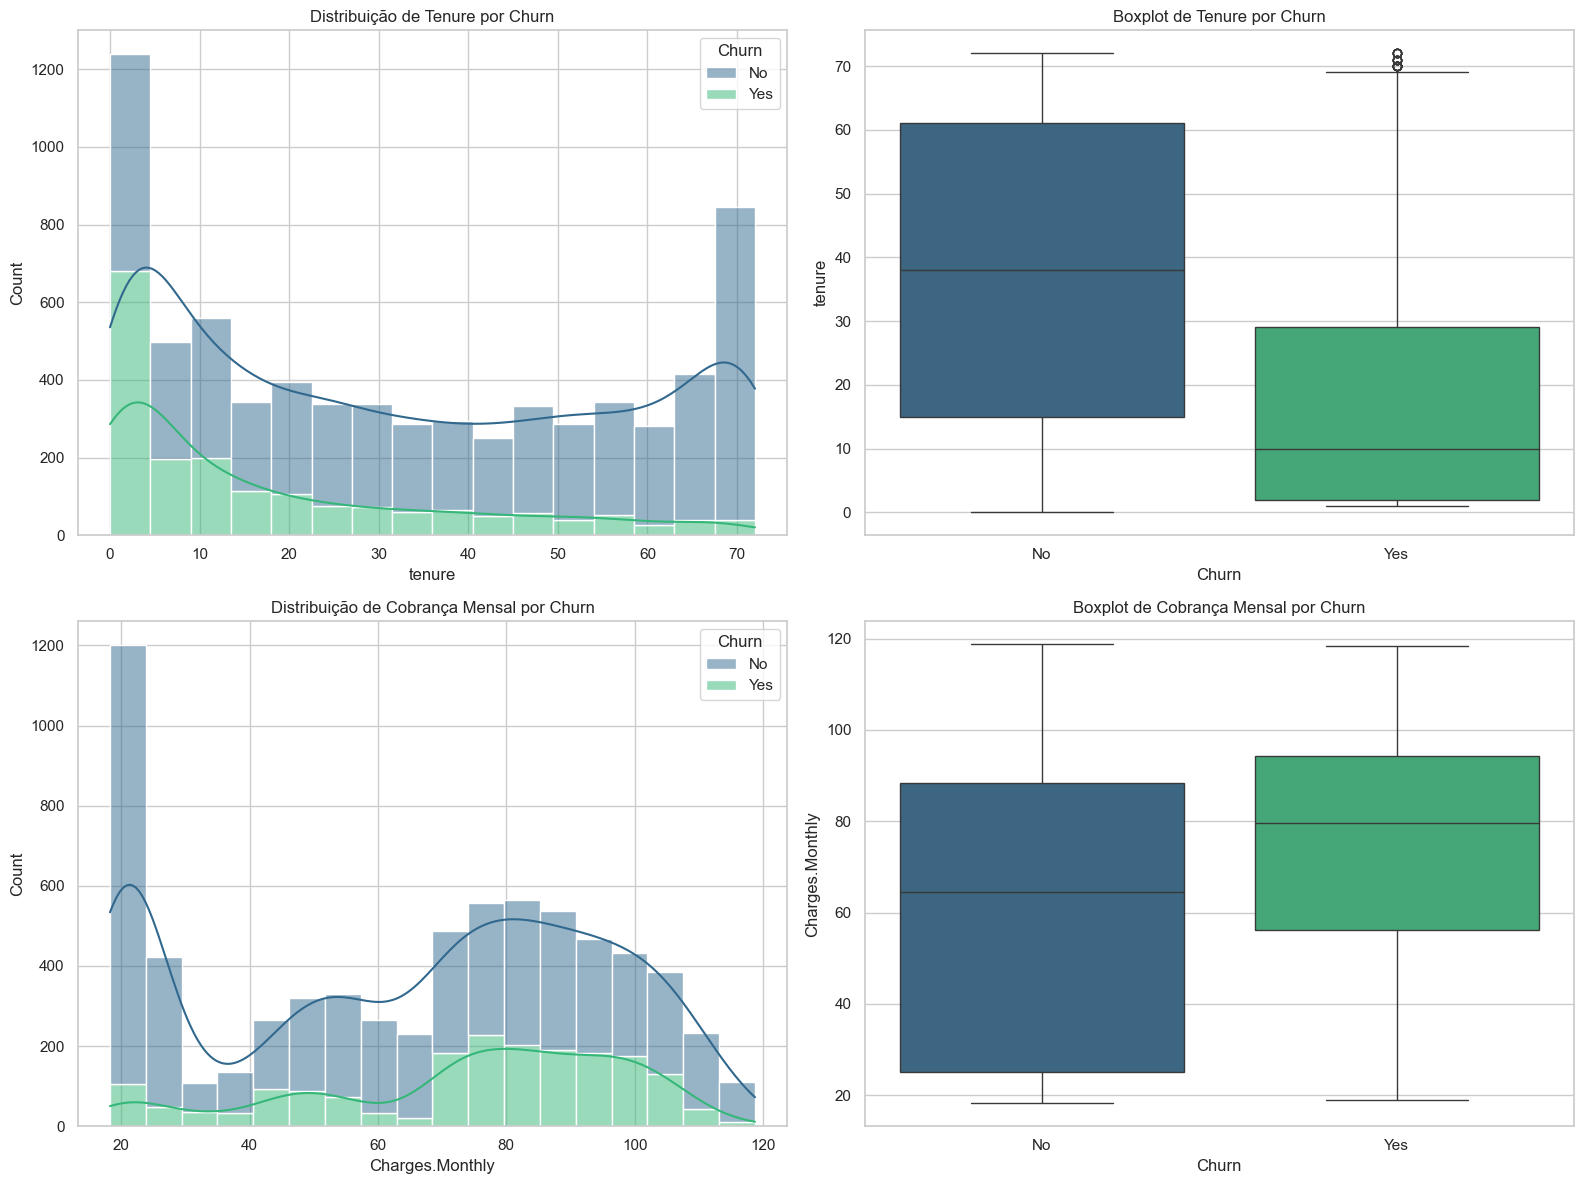

In [19]:
features_numericas = ['tenure', 'Charges.Monthly']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Histograma e Boxplot para Tenure
sns.histplot(data=df_limpo, x='tenure', hue='Churn', multiple='stack', ax=axes[0, 0], palette='viridis', kde=True)
axes[0, 0].set_title('Distribuição de Tenure por Churn')

sns.boxplot(data=df_limpo, x='Churn', hue='Churn', y='tenure', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Boxplot de Tenure por Churn')

# Histograma e Boxplot para Charges.Monthly
sns.histplot(data=df_limpo, x='Charges.Monthly', hue='Churn', multiple='stack', ax=axes[1, 0], palette='viridis', kde=True)
axes[1, 0].set_title('Distribuição de Cobrança Mensal por Churn')

sns.boxplot(data=df_limpo, x='Churn', hue='Churn',y='Charges.Monthly', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Boxplot de Cobrança Mensal por Churn')

plt.tight_layout()
plt.show()

**Conclusões Preliminares:**
* **Tenure (Tempo de Contrato):** O histograma mostra uma grande concentração de churn em clientes com baixo tempo de contrato (clientes novos). O boxplot confirma que a mediana do `tenure` para clientes que cancelam é muito menor.
* **Charges.Monthly (Cobrança Mensal):** Clientes que cancelam tendem a ter uma cobrança mensal mais alta, como mostra a mediana no boxplot. O histograma revela uma concentração de churn na faixa de $70 a $100.

### 4. Matriz de Correlação

Analisamos a correlação linear entre as principais variáveis numéricas do dataset.

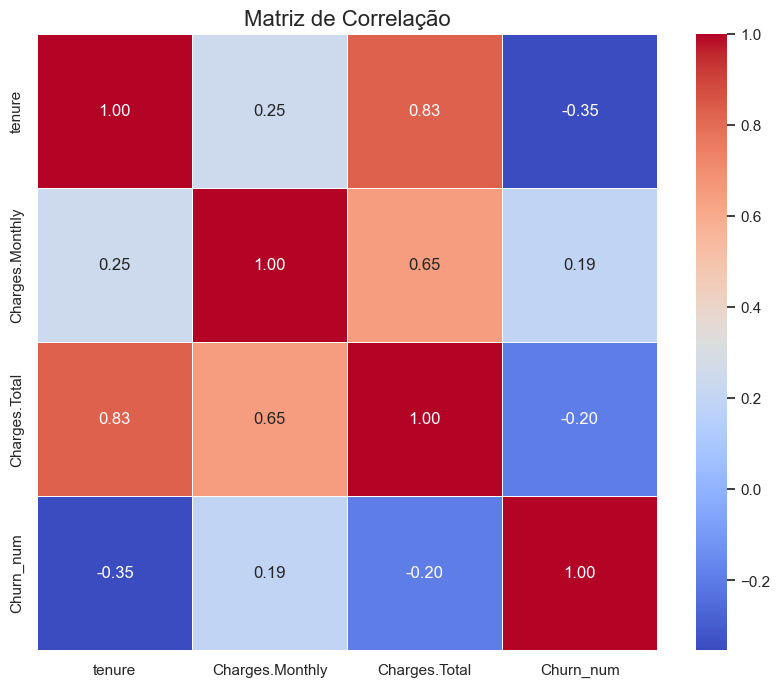

In [20]:
colunas_numericas_corr = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Churn_num']
correlation_matrix = df_limpo[colunas_numericas_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

**Conclusões Preliminares:**
* **Forte Correlação Positiva:** `tenure` e `Charges.Total` (0.83) estão fortemente correlacionadas, o que é esperado, pois quanto mais tempo um cliente permanece, maior o valor total pago.
* **Correlação com Churn:**
    * `tenure` tem uma correlação negativa (-0.35) com o churn, confirmando que clientes mais antigos tendem a cancelar menos.
    * `Charges.Monthly` tem uma correlação positiva (0.19), indicando que cobranças mensais mais altas estão associadas a um maior risco de churn.

# Fase 3: Modelagem Preditiva de Churn

Nesta fase, construiremos e avaliaremos diversos modelos de machine learning para prever a probabilidade de um cliente cancelar o serviço. O processo seguirá os seguintes passos:

1.  **Preparação dos Dados**: Carregamento do dataset pré-processado e divisão em conjuntos de treino e teste.
2.  **Criação de Pipelines**: Construção de pipelines que integram pré-processamento (padronização dos dados), tratamento de desbalanceamento (SMOTE) e o modelo em si. Esta abordagem garante que o tratamento dos dados seja feito de forma correta dentro da validação cruzada.
3.  **Validação Cruzada**: Avaliação robusta de três modelos (Regressão Logística, Random Forest, XGBoost) usando validação cruzada estratificada para obter uma estimativa de performance confiável.
4.  **Avaliação Final**: Treinamento do modelo no conjunto de treino completo e avaliação final no conjunto de teste, que foi mantido intocado até agora.
5.  **Visualização de Resultados**: Plotagem das curvas ROC e Precision-Recall para comparar visualmente o desempenho dos modelos.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e Modelagem
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Tratamento de Desbalanceamento e Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Métricas de Avaliação
from sklearn.metrics import (
    roc_auc_score, 
    classification_report, 
    roc_curve, 
    precision_recall_curve, 
    auc
)

# Configurações
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [22]:
# 1.1 Divisão em Features (X) e Alvo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# 1.2 Divisão em Treino e Teste (70/30)
# Usamos stratify=y para garantir que a proporção de churn seja a mesma nos conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")

Formato de X_train: (4930, 29)
Formato de X_test: (2113, 29)


### 2. Criação do Pipeline de Modelagem

Vamos definir os modelos e criar um pipeline para cada um. O pipeline irá executar as seguintes etapas em sequência: 
1. `StandardScaler()`: Padroniza as features (média 0, desvio padrão 1).
2. `SMOTE()`: Balanceia o conjunto de dados criando amostras sintéticas da classe minoritária (apenas nos dados de treino).
3. `Classifier()`: O algoritmo de machine learning.

In [23]:
# Definindo os modelos
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Criando os pipelines
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

### 3. Treinamento e Avaliação com Validação Cruzada

Usaremos validação cruzada estratificada com 5 folds para avaliar a performance (AUC-ROC) de cada pipeline de forma robusta nos dados de treino.

In [24]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

print("Resultados da Validação Cruzada (AUC-ROC):\n")
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='roc_auc')
    cv_results[name] = scores
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

Resultados da Validação Cruzada (AUC-ROC):

Logistic Regression: 0.8458 (+/- 0.0060)
Random Forest: 0.8240 (+/- 0.0080)
XGBoost: 0.8139 (+/- 0.0026)


### 4. Avaliação Final no Conjunto de Teste

Agora, vamos treinar cada pipeline no conjunto de treino completo e fazer previsões no conjunto de teste para a avaliação final.

In [25]:
final_results = {}

for name, pipeline in pipelines.items():
    # Treinar o pipeline com todos os dados de treino
    pipeline.fit(X_train, y_train)
    
    # Fazer previsões no conjunto de teste
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calcular métricas
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC no Teste: {roc_auc:.4f}")
    
    # Guardar resultados para plotagem
    final_results[name] = {'proba': y_pred_proba, 'roc_auc': roc_auc}


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.52      0.79      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

AUC-ROC no Teste: 0.8397

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1552
           1       0.58      0.60      0.59       561

    accuracy                           0.78      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113

AUC-ROC no Teste: 0.8223

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1552
           1       0.56      0.56      0.56       561

    accuracy                           0.77      2113
   macro 

### 5. Visualização das Curvas de Avaliação

As curvas ROC e Precision-Recall são excelentes para comparar o desempenho dos classificadores em datasets desbalanceados.

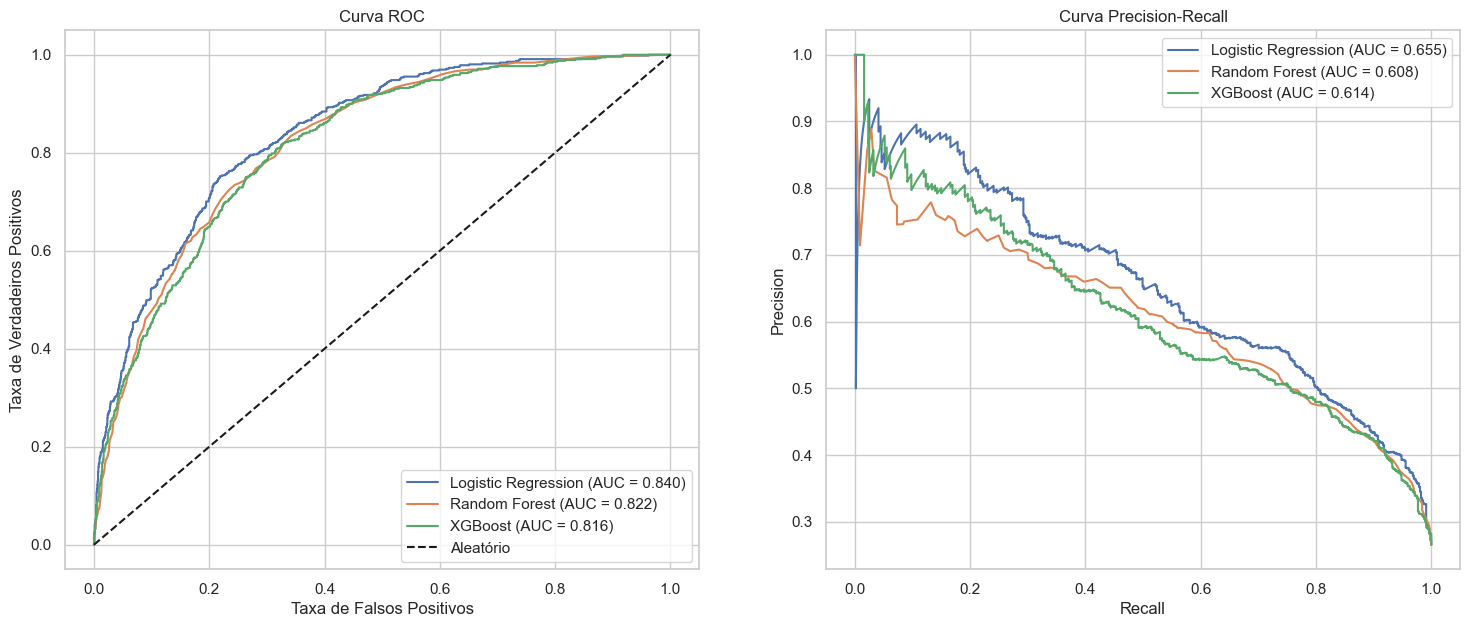

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Plotar Curva ROC
for name, result in final_results.items():
    fpr, tpr, _ = roc_curve(y_test, result['proba'])
    ax1.plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.3f})")

ax1.plot([0, 1], [0, 1], 'k--', label='Aleatório')
ax1.set_xlabel('Taxa de Falsos Positivos')
ax1.set_ylabel('Taxa de Verdadeiros Positivos')
ax1.set_title('Curva ROC')
ax1.legend()

# Plotar Curva Precision-Recall
for name, result in final_results.items():
    precision, recall, _ = precision_recall_curve(y_test, result['proba'])
    pr_auc = auc(recall, precision)
    ax2.plot(recall, precision, label=f"{name} (AUC = {pr_auc:.3f})")

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Curva Precision-Recall')
ax2.legend()

plt.show()

### 6. Otimização de Hiperparâmetros (Fine-Tuning) do XGBoost

Vamos focar em otimizar o XGBoost. Usaremos `RandomizedSearchCV` para testar diferentes combinações de hiperparâmetros de forma eficiente. Em vez de SMOTE, vamos usar o parâmetro `scale_pos_weight` do próprio XGBoost para lidar com o desbalanceamento, que calcula o peso para a classe positiva (churn) e o aplica durante o treinamento.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e Modelagem
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Tratamento de Desbalanceamento e Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Métricas de Avaliação
from sklearn.metrics import (
    roc_auc_score, 
    classification_report, 
    roc_curve, 
    precision_recall_curve, 
    auc
)

# Configurações
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [30]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = ImbPipeline([('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)), ('model', model)])

final_results_baseline = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC no Teste: {roc_auc:.4f}")
    final_results_baseline[name] = {'proba': y_pred_proba, 'roc_auc': roc_auc}


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.52      0.79      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

AUC-ROC no Teste: 0.8397

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1552
           1       0.58      0.60      0.59       561

    accuracy                           0.78      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113

AUC-ROC no Teste: 0.8223

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1552
           1       0.56      0.56      0.56       561

    accuracy                           0.77      2113
   macro 

In [31]:
# Calculando scale_pos_weight
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Valor de scale_pos_weight calculado: {scale_pos_weight:.2f}")

# Pipeline para otimização (sem SMOTE)
xgb_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Grade de parâmetros para a busca
param_grid = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__max_depth': [3, 4, 5, 6],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.8, 0.9],
    'model__gamma': [0, 0.1, 0.2],
    'model__scale_pos_weight': [scale_pos_weight] # Usando o parâmetro nativo
}

# Configurando a busca aleatória
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb_pipeline, 
    param_distributions=param_grid, 
    n_iter=50, # Número de combinações a testar
    cv=kfold, 
    scoring='roc_auc', 
    n_jobs=-1, # Usar todos os cores da CPU
    random_state=42,
    verbose=1
)

# Executando a busca
print("\nIniciando a busca por hiperparâmetros...")
random_search.fit(X_train, y_train)

print(f"\nMelhor Score (AUC) na Validação Cruzada: {random_search.best_score_:.4f}")
print("Melhores Hiperparâmetros Encontrados:")
print(random_search.best_params_)

Valor de scale_pos_weight calculado: 2.77

Iniciando a busca por hiperparâmetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Melhor Score (AUC) na Validação Cruzada: 0.8472
Melhores Hiperparâmetros Encontrados:
{'model__subsample': 0.9, 'model__scale_pos_weight': np.float64(2.7691131498470947), 'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.05, 'model__gamma': 0, 'model__colsample_bytree': 0.9}


### 7. Avaliação Final do Modelo Otimizado

Agora, avaliamos o melhor modelo encontrado pelo `RandomizedSearchCV` no conjunto de teste.

In [32]:
# Pegar o melhor modelo
best_tuned_model = random_search.best_estimator_

# Fazer previsões
y_pred_tuned = best_tuned_model.predict(X_test)
y_pred_proba_tuned = best_tuned_model.predict_proba(X_test)[:, 1]

print("--- XGBoost Otimizado ---")
print(classification_report(y_test, y_pred_tuned))
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
print(f"AUC-ROC no Teste: {roc_auc_tuned:.4f}")

# Adicionar resultado ao dicionário para plotagem
final_results_baseline['XGBoost Otimizado'] = {'proba': y_pred_proba_tuned, 'roc_auc': roc_auc_tuned}

--- XGBoost Otimizado ---
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1552
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113

AUC-ROC no Teste: 0.8425


### 8. Visualização Comparativa Final

Vamos visualizar as curvas ROC e Precision-Recall novamente, agora incluindo o modelo XGBoost otimizado para uma comparação direta.

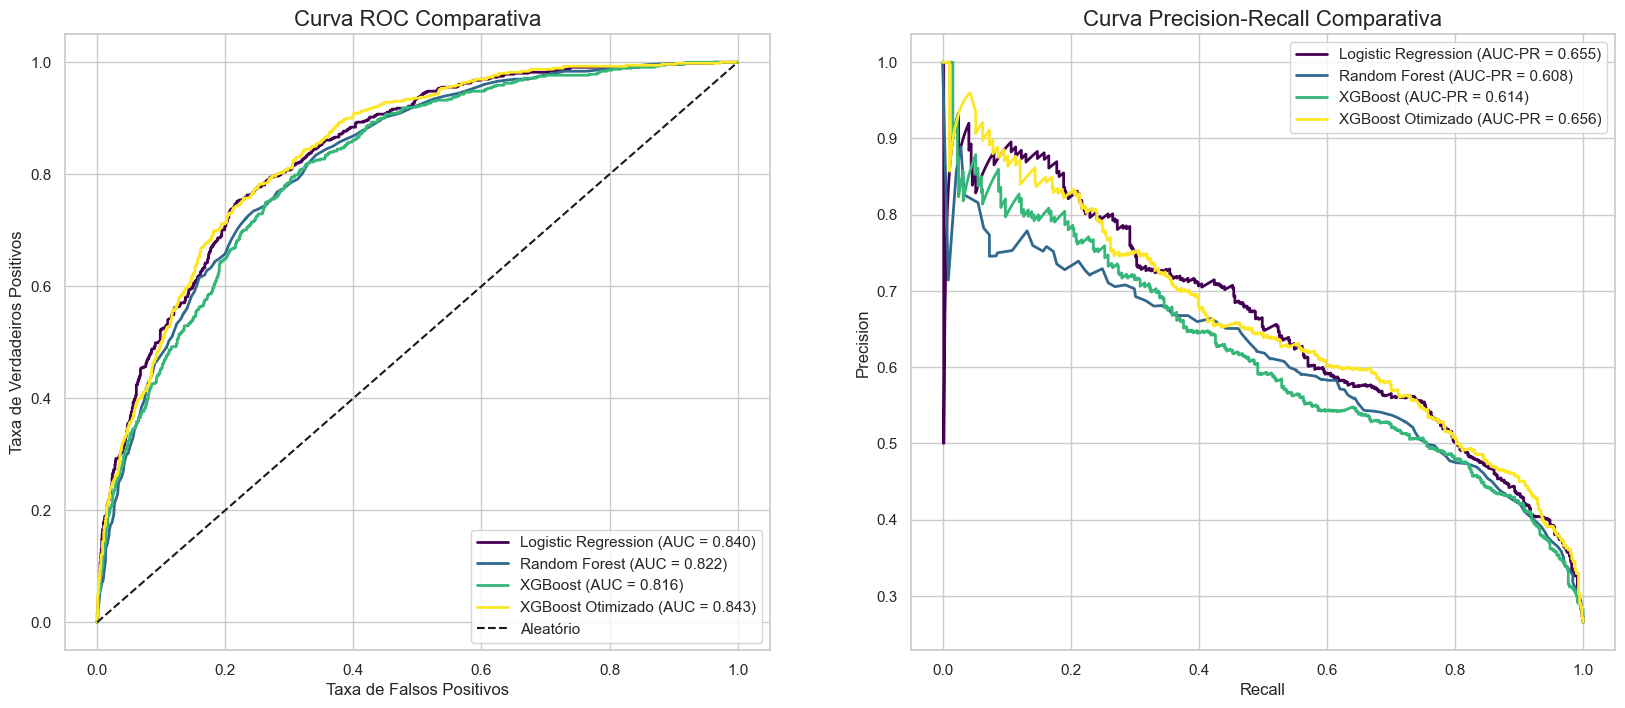

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(final_results_baseline)))

# Plotar Curva ROC
for (name, result), color in zip(final_results_baseline.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, result['proba'])
    ax1.plot(fpr, tpr, color=color, lw=2, label=f"{name} (AUC = {result['roc_auc']:.3f})")

ax1.plot([0, 1], [0, 1], 'k--', label='Aleatório')
ax1.set_xlabel('Taxa de Falsos Positivos')
ax1.set_ylabel('Taxa de Verdadeiros Positivos')
ax1.set_title('Curva ROC Comparativa', fontsize=16)
ax1.legend()

# Plotar Curva Precision-Recall
for (name, result), color in zip(final_results_baseline.items(), colors):
    precision, recall, _ = precision_recall_curve(y_test, result['proba'])
    pr_auc = auc(recall, precision)
    ax2.plot(recall, precision, color=color, lw=2, label=f"{name} (AUC-PR = {pr_auc:.3f})")

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Curva Precision-Recall Comparativa', fontsize=16)
ax2.legend()

plt.show()

# Fase 5: Otimização do Limiar de Decisão para Melhor Precisão

Nosso modelo XGBoost otimizado apresentou um excelente recall (80%), mas uma precisão modesta (51%). Isso significa que, embora ele identifique a maioria dos clientes que vão cancelar, ele também gera muitos "falsos alarmes".

Nesta fase final, vamos abordar esse desequilíbrio ajustando o **limiar de decisão** do classificador. O objetivo é encontrar um novo ponto de corte que aumente a precisão, fornecendo uma lista mais confiável de clientes para ações de retenção, mesmo que isso implique em uma pequena redução no recall.

**Estratégia:**
1.  Treinar o melhor modelo encontrado na fase anterior.
2.  Gerar as probabilidades de previsão para os dados de treino.
3.  Calcular a curva Precision-Recall e encontrar o limiar que maximiza o F1-Score.
4.  Comparar o desempenho no conjunto de teste usando o limiar padrão (0.5) contra o novo limiar otimizado.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e Modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Métricas de Avaliação
from sklearn.metrics import (
    classification_report, 
    precision_recall_curve, 
    f1_score
)

# Configurações
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

### 1. Preparação e Treinamento do Modelo Final

Primeiro, recarregamos os dados e treinamos o nosso melhor modelo (XGBoost com os hiperparâmetros otimizados) para que tenhamos uma base para trabalhar.

In [35]:
# Hiperparâmetros do melhor modelo XGBoost (da fase anterior)
best_params = {
    'subsample': 0.9,
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.05,
    'gamma': 0,
    'colsample_bytree': 0.9,
    'scale_pos_weight': 2.77 # Usando o valor calculado anteriormente
}

# Criar e treinar o pipeline final
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **best_params))
])

final_model.fit(X_train, y_train)
print("Modelo final treinado com sucesso.")

Modelo final treinado com sucesso.


### 2. Encontrando o Limiar Ótimo

Vamos usar as previsões de probabilidade no **conjunto de treino** para encontrar o limiar ideal. Isso evita qualquer vazamento de informação do conjunto de teste. O limiar ideal será aquele que maximiza o F1-Score.

Melhor Limiar: 0.5544
F1-Score no ponto ótimo: 0.6660
Precisão no ponto ótimo: 0.5703
Recall no ponto ótimo: 0.8005


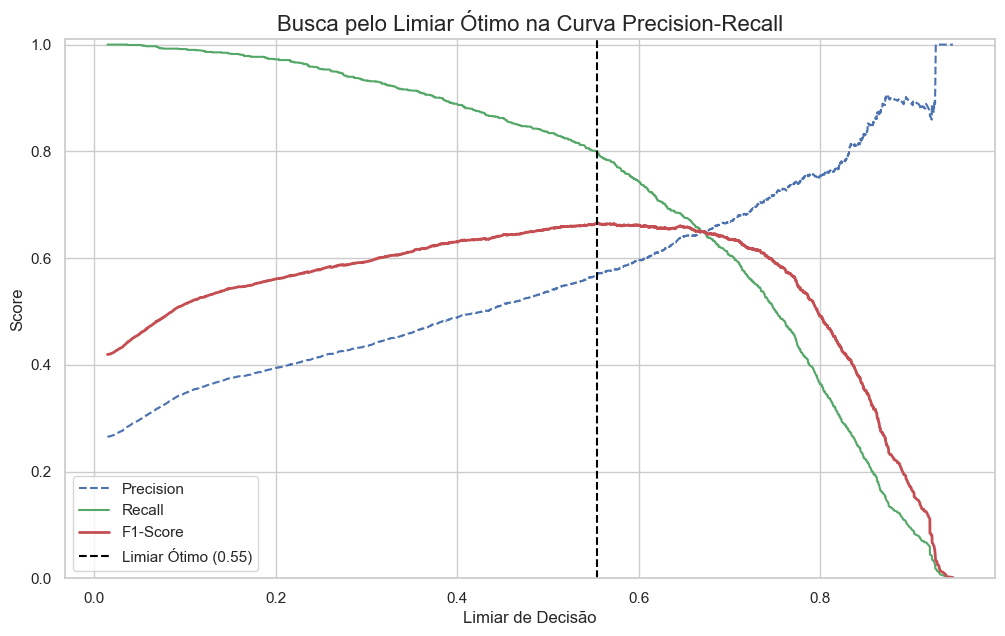

In [36]:
# Obter probabilidades no conjunto de treino
y_train_proba = final_model.predict_proba(X_train)[:, 1]

# Calcular precision, recall e limiares
precision, recall, thresholds = precision_recall_curve(y_train, y_train_proba)

# Calcular F1-score para cada limiar (evitando divisão por zero)
f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)

# Encontrar o melhor limiar
ix = np.argmax(f1_scores)
optimal_threshold = thresholds[ix]

print(f"Melhor Limiar: {optimal_threshold:.4f}")
print(f"F1-Score no ponto ótimo: {f1_scores[ix]:.4f}")
print(f"Precisão no ponto ótimo: {precision[ix]:.4f}")
print(f"Recall no ponto ótimo: {recall[ix]:.4f}")

# Visualização da busca pelo limiar
plt.figure(figsize=(12, 7))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores[:-1], 'r-', lw=2, label='F1-Score')
plt.axvline(optimal_threshold, color='black', linestyle='--', label=f'Limiar Ótimo ({optimal_threshold:.2f})')
plt.title('Busca pelo Limiar Ótimo na Curva Precision-Recall', fontsize=16)
plt.xlabel('Limiar de Decisão')
plt.ylabel('Score')
plt.legend()
plt.ylim([0, 1.01])
plt.grid(True)
plt.show()

### 3. Avaliação Comparativa no Conjunto de Teste

Agora, aplicamos o limiar padrão (0.5) e o nosso novo limiar otimizado às probabilidades do conjunto de teste para comparar os resultados finais.

In [37]:
# Obter probabilidades no conjunto de teste
y_test_proba = final_model.predict_proba(X_test)[:, 1]

print("--- Avaliação com Limiar Padrão (0.5) ---")
y_pred_default = (y_test_proba >= 0.5).astype(int)
print(classification_report(y_test, y_pred_default))

print("--- Avaliação com Limiar Otimizado --- ")
y_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))

--- Avaliação com Limiar Padrão (0.5) ---
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1552
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113

--- Avaliação com Limiar Otimizado --- 
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1552
           1       0.54      0.76      0.63       561

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113



### Análise Comparativa dos Resultados: Limiar Padrão vs. Limiar Otimizado


A otimização do limiar de decisão alcançou seu objetivo técnico: **aumentar a precisão do modelo**. No entanto, a análise mostra que o ganho foi **modesto**. O novo modelo é objetivamente melhor, com um F1-Score e uma precisão ligeiramente superiores, mas não representa uma mudança transformacional no desempenho. Isso fortemente indica que, com as features atuais, atingimos o limite do que é possível otimizar e que o próximo grande salto de performance dependerá de outras abordagens, como a engenharia de novas features.

---

#### Comparação Direta das Métricas (para a classe Churn = 1)

Para visualizar o impacto do ajuste, vamos comparar as métricas lado a lado:

| Métrica (para Churn=1) | Limiar Padrão (0.5) | Limiar Otimizado | Mudança (Variação Percentual) |
|:---|:---:|:---:|:---:|
| **Precisão** | 0.51 | **0.54** | **+5.9%** |
| **Recall** | 0.80 | **0.76** | -5.0% |
| **F1-Score** | 0.62 | **0.63** | **+1.6%** |

---

#### Interpretação Detalhada

**1. O Ganho em Precisão (De 51% para 54%)**

* **O que significa?** Conseguimos o que queríamos. A precisão aumentou, o que torna a lista de clientes para a equipe de retenção um pouco mais "pura". Quando o novo modelo diz que um cliente vai cancelar, a chance de ele estar correto é maior do que antes.
* **Impacto de Negócio:** Isso reduz o desperdício de recursos. Menos tempo e dinheiro serão gastos em clientes que não tinham intenção de cancelar (falsos positivos). O ganho, embora pequeno (3 pontos percentuais), é positivo.

**2. O Custo em Recall (De 80% para 76%)**

* **O que significa?** Este é o "trade-off" esperado. Para obter uma lista mais precisa, tivemos que abrir mão de uma pequena parte da nossa "cobertura". Em vez de identificarmos 80 de cada 100 clientes que realmente cancelariam, agora identificamos 76.
* **Impacto de Negócio:** Quatro clientes a mais (em cada 100 que cancelam) passarão despercebidos pelo nosso sistema de retenção. A empresa precisa decidir se a melhoria na precisão justifica essa pequena perda na capacidade de detecção.

**3. Um Equilíbrio Ligeiramente Melhor (F1-Score de 0.62 para 0.63)**

* **O que significa?** O F1-Score, que busca o equilíbrio entre precisão e recall, teve uma melhora mínima. Isso confirma que a nova configuração do modelo é tecnicamente superior, mas apenas por uma margem muito pequena.

#### Conclusão Final e Recomendação Estratégica

**Por que a melhora foi tão modesta?**
A principal razão é que provavelmente já estamos operando na "fronteira de performance" do nosso modelo com as features atuais. A curva Precision-Recall para este problema pode não ter um "cotovelo" acentuado, o que significa que não há um ponto de corte mágico que melhore drasticamente uma métrica sem prejudicar a outra. Nós esprememos quase todo o potencial que a otimização de limiar poderia oferecer.

**Recomendação Final:**

O **modelo com o limiar otimizado é a escolha correta**, pois ele é objetivamente superior e está mais alinhado com o objetivo de melhorar a precisão. No entanto, é fundamental comunicar aos stakeholders que esta otimização refina o modelo, mas não reinventa seus resultados.

**Os Próximos Passos:**

Dado que atingimos um platô de performance com as técnicas de modelagem e otimização, o foco para melhorias futuras deve mudar para os dados em si:

1.  **Engenharia de Features (Prioridade Máxima):** O maior ganho virá daqui. Devemos criar novas features que possam capturar nuances que o modelo ainda não vê. Exemplos:
    * Variação do uso de dados/serviços nos últimos 3 meses.
    * Número de chamados para o suporte técnico.
    * Há quanto tempo o método de pagamento está ativo.
    * Proporção entre a cobrança mensal e a cobrança total.

2.  **Análise de Custo-Benefício:** Realizar um estudo formal para definir o custo exato de uma ação de retenção versus o `Lifetime Value` (LTV) de um cliente. Com esses números, poderíamos criar uma métrica de avaliação customizada, mais poderosa que o F1-Score, para otimizar o modelo visando o máximo retorno financeiro.